<span style='color:Blue'> <span style="font-size:25px;"> **[3-BRSA-944A-RJS] Loading-Sorting-Preprocessing-create log plot-export CSV file of a DLIS file**

In [1]:
%%capture

%pip install dlisio                                                   
%pip install qbstyles                                                 
%pip install folium 
%pip install geopandas

from dlisio import dlis
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches                                 

import folium                                                         
from folium import plugins 
import json                                                           

from qbstyles import mpl_style
mpl_style(dark=False)                                                 

from matplotlib_inline.backend_inline import set_matplotlib_formats   
set_matplotlib_formats('svg')                                         

<span style='color:brown'> <span style="font-size:19px;"> **STEP 2: load all the required DLIS files**

In [2]:
dlis0, *tail0 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/3-BRSA-944A-RJS/Perfil Convencional/3-brsa-944a-rjs_8_ait_msipf.dlis')
dlis1, *tail1 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/3-BRSA-944A-RJS/Perfil Convencional/3-brsa-944a-rjs_8_cmr_apoio.dlis')  # NMR
dlis2, *tail2 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/3-BRSA-944A-RJS/Perfil Convencional/3-brsa-944a-rjs_8_cmr_hngsf.dlis')   
#dlis3, *tail3 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/3-BRSA-944A-RJS/Perfil Convencional/')

In [3]:
# Define a list of dlis object names (assuming dlis0, dlis1, ..., dlis9 exist)
dlis_names = [f'dlis{i}' for i in range(3)]

# Define depth_units
depth_units = "in"  # Replace "units" with the actual units you want to use

for dlis_name in dlis_names:
    dlis = globals()[dlis_name]  # Get the dlis object using its name
    print("=" * 80)
    print(f"DLIS Object: {dlis_name}")
    print("=" * 80)

    for frame in dlis.frames:
        print(f"Frame Name:         {frame.name}")
        print(f"Number of Channels: {len(frame.channels)}")
        print(f"Depth Interval:     {frame.index_min} - {frame.index_max} {depth_units}")
        print(f"Depth Spacing:      {frame.spacing} {depth_units}")
        print(f"Channel Names:      {', '.join(channel.name for channel in frame.channels)}")
        print("-" * 80)

    print("%" * 80)

DLIS Object: dlis0
Frame Name:         60B
Number of Channels: 193
Depth Interval:     2130900 - 2365920 in
Depth Spacing:      -60 in
Channel Names:      TDEP, BS, CS, TENS, ETIM, BHPR, RT, SP, SPAR, ITT, SPHI, DTCO3, DTSH3, DTSH5, DTSH6, DTSM, PR, VPVS, DTCO, SOBS, TWIND_TOTAL, DCSI1, DCSI2, DCSI3, DCSI4, DCSI5, DCSI6, ANSCLASS_ANI_MAST, ANSCLASS_AWF_MAST, ANSCLASS_BHC_MAST, ANSCLASS_BARS_MAST, ANSCLASS_CBL_MAST, ANSCLASS_CA_MAST, ANSCLASS_CP_MAST, ANSCLASS_FAN_MAST, ANSCLASS_FS_MAST, ANSCLASS_FRAC_MAST, ANSCLASS_GEO_MAST, ANSCLASS_LSS_MAST, ANSCLASS_MPN_MAST, ANSCLASS_MPF_MAST, ANSCLASS_MP_MAST, ANSCLASS_PS_MAST, ANSCLASS_RES_MAST, ANSCLASS_SEI_MAST, PXND_HILT, RHGX_HILT, UMA_HILT, HPATT, HLRGB, PHIE_HILT, RMFA_HILT, RO_HILT, VCL_HILT, RWA_HILT, SW_HILT, QCBSL, BSD1, SSD1, LSD1, QCMCFL, RXIG, ECGR, CFGR, GR, RTNR, NPHI, NPL, DRTA, DNPH, QCPOR, TNPH, TALP, RCFT, RCNT, CFTC, TNRA, CNTC, NPOR, GDEV, HWER, TGST, ECGR_EDTC, GR_EDTC, GDEV_EDTC, DCAL, FCD, HDAR, ASCA, ASFI, RD1_PPC1, RD2_P

<span style='color:green'> <span style="font-size:19px;"> **STEP 2: create Pandas DataFrames containing all the required Well Log Data**

**dlis0 - 60B**

TDEP - Total Depth

GR - Gamma Ray
DTCO - Compressional Wave Sonic Travel Time
NPHI - Neutron Porosity

**dlis0 - 20B**

PEFZ - Formation Photoelectric Factor, Environmental Corrections (EDTC)
RHOZ - Bulk Density, Environmental Corrections (EDTC)

**dlis0 - 30B**
AT10 - Acoustic Travel Time at 10 degrees
AT20 - Acoustic Travel Time at 20 degrees
AT30 - Acoustic Travel Time at 30 degrees
AT60 - Acoustic Travel Time at 60 degrees
AT90 - Acoustic Travel Time at 90 degrees


**dlis1 - 75B**

CMRP_3MS
CMFF
TCMR

**dlis2 - 75B**

CMRP_3MS
CMFF
TCMR

 
 <div style="text-align: right;">
 
| Lithological Log | Resistivity Log | Porosity Logs |
|:---------------- |:---------------:|--------------:|
| RHGX_HILT        | AT10 .ohm.m     | NPHI    |
| NPHI             | AT20 .ohm.m     |          |
| GR             | AT30 .ohm.m     |          |
|              | AT30 .ohm.m     |          |
|              | AT30 .ohm.m     |          |

In [4]:
# Create variable "f" which stands for frame
f0 = dlis0.object('FRAME','60B')
f1 = dlis0.object('FRAME','20B')
f2 = dlis0.object('FRAME','30B')
f3 = dlis1.object('FRAME','75B')
f4 = dlis2.object('FRAME','75B')

In [5]:
# Create variables "c" which stands for channel
c0 = f0.curves()
c1 = f1.curves()
c2 = f2.curves()
c3 = f3.curves()
c4 = f4.curves()

In [6]:
# Define the channels/logging curves of interest for each frame "f"
# Convert DEPTH values to metres, by multiplying by 0.00254. 
# *0.00254

d0  = {'DEPTH'     : c0['TDEP']*0.00254,
       'GR'        : c0['GR'],
       'DTCO'      : c0['DTCO'],
       'NPHI'      : c0['NPHI']}
    
d1  = {'DEPTH'     : c1['TDEP']*0.00254,
       'PEFZ'      : c1['PEFZ'],
       'RHOZ'      : c1['RHOZ']}

d2  = {'DEPTH'     : c2['TDEP']*0.00254,
       'AT10'      : c2['AT10'],
       'AT20'      : c2['AT20'],
       'AT30'      : c2['AT30'],
       'AT60'      : c2['AT60'],
       'AT90'      : c2['AT90'],}

d3  = {'DEPTH'   : c3['TDEP']*0.00254,
       'CMRP_3MS': c3['CMRP_3MS']/100,
       'CMFF'    : c3['CMFF']/100,
       'TCMR'    : c3['TCMR']/100}

d4  = {'DEPTH'   : c4['TDEP']*0.00254,
       'CMRP_3MS': c4['CMRP_3MS']/100,
       'CMFF'    : c4['CMFF']/100,
       'TCMR'    : c4['TCMR']/100}

In [7]:
# Create dataframes containing the required well logging curves 
df0 = pd.DataFrame(d0)  
df1 = pd.DataFrame(d1)  
df2 = pd.DataFrame(d2)  
df3 = pd.DataFrame(d3)
df4 = pd.DataFrame(d4)

In [8]:
# Print the dataframes 
df0, df1, df2, df3, df4

(            DEPTH         GR        DTCO      NPHI
 0     6009.437012  38.224781 -999.250000  0.090613
 1     6009.284668  38.224781 -999.250000  0.090613
 2     6009.131836  38.224781 -999.250000  0.090613
 3     6008.979492  38.224781 -999.250000  0.090613
 4     6008.827148  38.224781   59.398567  0.090613
 ...           ...        ...         ...       ...
 3913  5413.095703  11.552358   66.379387  0.049696
 3914  5412.943359  11.780614   66.379387  0.055049
 3915  5412.791016  12.320129   66.379387  0.052712
 3916  5412.638672  12.174858   66.379387  0.052712
 3917  5412.485840  12.174858   66.379387  0.052712
 
 [3918 rows x 4 columns],
              DEPTH    PEFZ        RHOZ
 0      6009.437012 -999.25 -999.250000
 1      6009.386230 -999.25 -999.250000
 2      6009.335449 -999.25 -999.250000
 3      6009.284668 -999.25 -999.250000
 4      6009.233398 -999.25 -999.250000
 ...            ...     ...         ...
 11746  5412.740234   10.00    2.760735
 11747  5412.689453   10.00 

<span style='color:brown'> <span style="font-size:19px;"> **STEP 3: Data Pre-Processing**

In [9]:
# Remove "-999.250000" from each dataframe. It does not make any sense.
df0.drop(df0.loc[df0['GR']==-999.25].index, inplace=True)
df0.drop(df0.loc[df0['DTCO']==-999.25].index, inplace=True)
df0.drop(df0.loc[df0['NPHI']==-999.25].index, inplace=True)

df1.drop(df1.loc[df1['PEFZ']==-999.25].index, inplace=True)
df1.drop(df1.loc[df1['RHOZ']==-999.25].index, inplace=True)

df2.drop(df2.loc[df2['AT10']==-999.25].index, inplace=True)
df2.drop(df2.loc[df2['AT20']==-999.25].index, inplace=True)
df2.drop(df2.loc[df2['AT30']==-999.25].index, inplace=True)
df2.drop(df2.loc[df2['AT60']==-999.25].index, inplace=True)
df2.drop(df2.loc[df2['AT90']==-999.25].index, inplace=True)

df3.drop(df3.loc[df3['CMRP_3MS']==-9.9925].index, inplace=True)
df3.drop(df3.loc[df3['CMFF']==-9.9925].index, inplace=True)
df3.drop(df3.loc[df3['TCMR']==-9.9925].index, inplace=True)

df4.drop(df4.loc[df4['CMRP_3MS']==-9.9925].index, inplace=True)
df4.drop(df4.loc[df4['CMFF']==-9.9925].index, inplace=True)
df4.drop(df4.loc[df4['TCMR']==-9.9925].index, inplace=True)

In [10]:
# Reset the Index of each dataframe 
# (drop=True) means that the current Index will be replaced entirely 
df0 = df0.reset_index(drop=True)
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True) 
df4 = df4.reset_index(drop=True) 

In [11]:
df0, df1, df2, df3, df4

(            DEPTH         GR       DTCO      NPHI
 0     6008.827148  38.224781  59.398567  0.090613
 1     6008.674805  38.224781  59.398567  0.090613
 2     6008.522461  38.224781  59.398567  0.090613
 3     6008.370117  38.224781  59.398567  0.090613
 4     6008.217773  38.224781  59.398567  0.090613
 ...           ...        ...        ...       ...
 3909  5413.095703  11.552358  66.379387  0.049696
 3910  5412.943359  11.780614  66.379387  0.055049
 3911  5412.791016  12.320129  66.379387  0.052712
 3912  5412.638672  12.174858  66.379387  0.052712
 3913  5412.485840  12.174858  66.379387  0.052712
 
 [3914 rows x 4 columns],
              DEPTH       PEFZ      RHOZ
 0      6008.166992   9.907986  2.211344
 1      6008.116211   9.907986  2.211344
 2      6008.065430   9.907986  2.211344
 3      6008.014648   9.907986  2.211344
 4      6007.963867   9.907986  2.211344
 ...            ...        ...       ...
 11721  5412.740234  10.000000  2.760735
 11722  5412.689453  10.000000  

In [12]:
# Invert the order of values, in all the dataframes. By means "iloc indexer" we can select the columns in reverse order
df0  = df0.iloc[::-1]
df1  = df1.iloc[::-1]
df2  = df2.iloc[::-1]
df3  = df3.iloc[::-1]
df4  = df4.iloc[::-1]

In [13]:
# Reset the Index of each dataframe 
df0  = df0.reset_index(drop=True) 
df1  = df1.reset_index(drop=True)
df2  = df2.reset_index(drop=True)
df3  = df3.reset_index(drop=True)
df4  = df4.reset_index(drop=True)

In [14]:
# Print the new dataframes 
df0, df1, df2, df3, df4

(            DEPTH         GR       DTCO      NPHI
 0     5412.485840  12.174858  66.379387  0.052712
 1     5412.638672  12.174858  66.379387  0.052712
 2     5412.791016  12.320129  66.379387  0.052712
 3     5412.943359  11.780614  66.379387  0.055049
 4     5413.095703  11.552358  66.379387  0.049696
 ...           ...        ...        ...       ...
 3909  6008.217773  38.224781  59.398567  0.090613
 3910  6008.370117  38.224781  59.398567  0.090613
 3911  6008.522461  38.224781  59.398567  0.090613
 3912  6008.674805  38.224781  59.398567  0.090613
 3913  6008.827148  38.224781  59.398567  0.090613
 
 [3914 rows x 4 columns],
              DEPTH       PEFZ      RHOZ
 0      5412.536621  10.000000  2.760735
 1      5412.587402  10.000000  2.760735
 2      5412.638672  10.000000  2.760735
 3      5412.689453  10.000000  2.760735
 4      5412.740234  10.000000  2.760735
 ...            ...        ...       ...
 11721  6007.963867   9.907986  2.211344
 11722  6008.014648   9.907986  

In [15]:
 df0.describe(), df1.describe(), df2.describe(), df3.describe(), df4.describe()

(             DEPTH           GR         DTCO         NPHI
 count  3914.000000  3914.000000  3914.000000  3914.000000
 mean   5710.656738    20.779804    59.086128     0.091187
 std     172.214661    12.829930     4.936162     0.060129
 min    5412.485840     5.507435    45.275173    -0.013333
 25%    5561.571289    10.532850    55.386288     0.052956
 50%    5710.656738    17.271730    58.269678     0.086977
 75%    5859.742065    27.806128    62.041029     0.125335
 max    6008.827148   103.772942    90.466377     0.505501,
               DEPTH          PEFZ          RHOZ
 count  11726.000000  11726.000000  11726.000000
 mean    5710.353027      5.238801      2.761350
 std      171.965698      1.520691      0.650116
 min     5412.536621      2.689003      1.764958
 25%     5561.444336      4.344355      2.510877
 50%     5710.352051      4.810482      2.584935
 75%     5859.259277      5.491462      2.639349
 max     6008.166992     10.000000      4.628800,
              DEPTH       

<span style='color:brown'> <span style="font-size:19px;"> **STEP 4: Create dataframe of each well-log data [unique dataframe] to plot them versus depth**

**DLIS 0**
df0

In [16]:
df_GR = df0.drop(columns=["DTCO", "NPHI"])
df_DTCO = df0.drop(columns=["GR", "NPHI"])
df_NPHI = df0.drop(columns=["GR", "DTCO"])

In [17]:
df_GR, df_DTCO, df_NPHI

(            DEPTH         GR
 0     5412.485840  12.174858
 1     5412.638672  12.174858
 2     5412.791016  12.320129
 3     5412.943359  11.780614
 4     5413.095703  11.552358
 ...           ...        ...
 3909  6008.217773  38.224781
 3910  6008.370117  38.224781
 3911  6008.522461  38.224781
 3912  6008.674805  38.224781
 3913  6008.827148  38.224781
 
 [3914 rows x 2 columns],
             DEPTH       DTCO
 0     5412.485840  66.379387
 1     5412.638672  66.379387
 2     5412.791016  66.379387
 3     5412.943359  66.379387
 4     5413.095703  66.379387
 ...           ...        ...
 3909  6008.217773  59.398567
 3910  6008.370117  59.398567
 3911  6008.522461  59.398567
 3912  6008.674805  59.398567
 3913  6008.827148  59.398567
 
 [3914 rows x 2 columns],
             DEPTH      NPHI
 0     5412.485840  0.052712
 1     5412.638672  0.052712
 2     5412.791016  0.052712
 3     5412.943359  0.055049
 4     5413.095703  0.049696
 ...           ...       ...
 3909  6008.217773  0

**DLIS 0**

df1

In [18]:
# "PEFZ", "RHOZ"
df_PEFZ = df1.drop(columns=["RHOZ"])
df_RHOZ = df1.drop(columns=["PEFZ"])

In [19]:
df_PEFZ, df_RHOZ

(             DEPTH       PEFZ
 0      5412.536621  10.000000
 1      5412.587402  10.000000
 2      5412.638672  10.000000
 3      5412.689453  10.000000
 4      5412.740234  10.000000
 ...            ...        ...
 11721  6007.963867   9.907986
 11722  6008.014648   9.907986
 11723  6008.065430   9.907986
 11724  6008.116211   9.907986
 11725  6008.166992   9.907986
 
 [11726 rows x 2 columns],
              DEPTH      RHOZ
 0      5412.536621  2.760735
 1      5412.587402  2.760735
 2      5412.638672  2.760735
 3      5412.689453  2.760735
 4      5412.740234  2.760735
 ...            ...       ...
 11721  6007.963867  2.211344
 11722  6008.014648  2.211344
 11723  6008.065430  2.211344
 11724  6008.116211  2.211344
 11725  6008.166992  2.211344
 
 [11726 rows x 2 columns])

**DLIS 0**
df2

In [20]:
# "AT10", "AT20", "AT30", "AT60", "AT90"                             
df_AT = df2

In [21]:
df_AT

,DEPTH,AT10,AT20,AT30,AT60,AT90
0,5412.562012,1950.000000,0.706698,1950.000000,38.263775,123.580055
1,5412.638672,1950.000000,0.706698,1950.000000,38.263775,123.580055
2,5412.714844,1950.000000,0.706698,1950.000000,38.263775,123.580055
3,5412.791016,1950.000000,0.706698,1950.000000,38.263775,123.580055
4,5412.867188,1950.000000,0.706698,1950.000000,38.263775,123.580055
...,...,...,...,...,...,...
7829,6009.131836,42.154716,25.801645,22.284948,13.874457,10.647143
7830,6009.208008,42.153988,25.799906,22.282476,13.872669,10.645063
7831,6009.284668,42.152672,25.797550,22.280701,13.871208,10.642628
7832,6009.360840,42.151730,25.798092,22.278793,13.869311,10.639974


**DLIS 1 & 2**

df3, df4

* CMRP_3MS      
* CMFF
* TCMR

In [22]:
# We consider df4 and df8 (only the DEPTH and GR columns)
df3_NMR = df3
df4_NMR = df4
df3_NMR,df4_NMR

(            DEPTH  CMRP_3MS      CMFF      TCMR
 0     4694.986816  0.000025  0.000004  0.017867
 1     4695.177246  0.000025  0.000004  0.017867
 2     4695.367676  0.000025  0.000004  0.017875
 3     4695.558105  0.000025  0.000004  0.017875
 4     4695.749023  0.000025  0.000004  0.017875
 ...           ...       ...       ...       ...
 5340  5712.256836  0.083593  0.069591  0.089989
 5341  5712.447266  0.083593  0.069591  0.089989
 5342  5712.637695  0.083593  0.069591  0.089989
 5343  5712.828125  0.083593  0.069591  0.089989
 5344  5713.019043  0.083593  0.069591  0.089989
 
 [5345 rows x 4 columns],
             DEPTH  CMRP_3MS      CMFF      TCMR
 0     5450.014648  0.000013  0.000013  0.000059
 1     5450.205078  0.000013  0.000013  0.000059
 2     5450.395508  0.000013  0.000013  0.000059
 3     5450.585938  0.000013  0.000013  0.000059
 4     5450.776367  0.000013  0.000013  0.000059
 ...           ...       ...       ...       ...
 2887  5999.988281  0.000731  0.000559  0

In [23]:
# We consider df4_GR (only from 5207.799991 m down to 5807.099999 m)
df4_NMR = df4_NMR.drop(df4_NMR.index[:1383])  # We remove all the rows until index 1217
df4_NMR

,DEPTH,CMRP_3MS,CMFF,TCMR
1383,5713.476074,0.001087,0.000878,0.001116
1384,5713.666504,0.000955,0.000757,0.000955
1385,5713.856934,0.000845,0.000637,0.000845
1386,5714.047363,0.000876,0.000665,0.000932
1387,5714.237793,0.001003,0.000770,0.001157
...,...,...,...,...
2887,5999.988281,0.000731,0.000559,0.000931
2888,6000.178711,0.000680,0.000506,0.000838
2889,6000.369141,0.000647,0.000550,0.000719
2890,6000.559570,0.000669,0.000583,0.000669


In [24]:
df_NMR = pd.concat([df3_NMR, df4_NMR], axis = 0, ignore_index = True)
df_NMR

,DEPTH,CMRP_3MS,CMFF,TCMR
0,4694.986816,0.000025,0.000004,0.017867
1,4695.177246,0.000025,0.000004,0.017867
2,4695.367676,0.000025,0.000004,0.017875
3,4695.558105,0.000025,0.000004,0.017875
4,4695.749023,0.000025,0.000004,0.017875
...,...,...,...,...
6849,5999.988281,0.000731,0.000559,0.000931
6850,6000.178711,0.000680,0.000506,0.000838
6851,6000.369141,0.000647,0.000550,0.000719
6852,6000.559570,0.000669,0.000583,0.000669


# PLOT

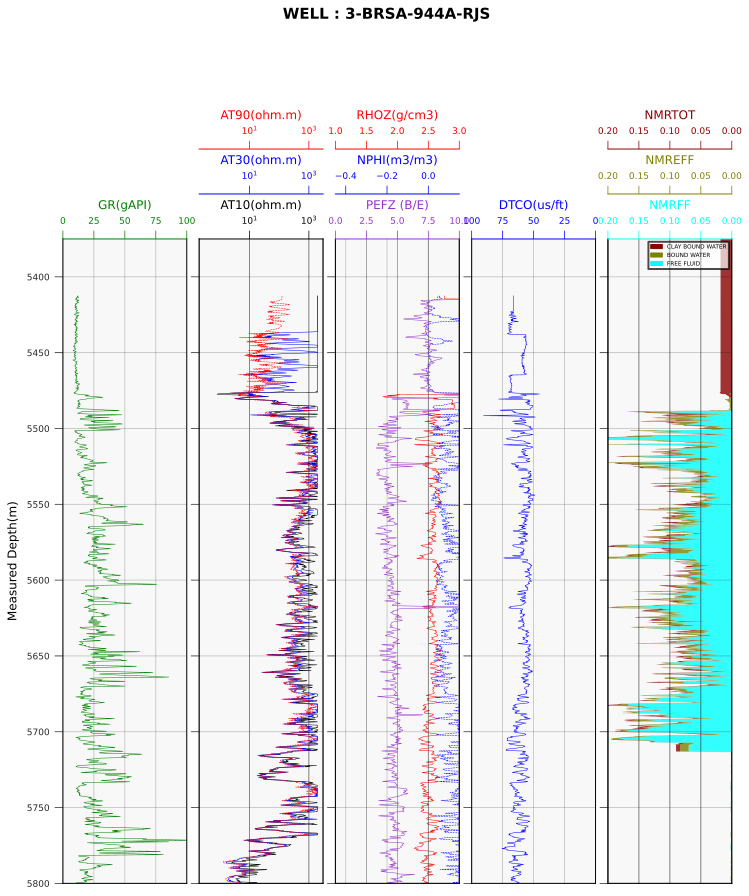

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,14))
fig.suptitle("WELL : 3-BRSA-944A-RJS", fontsize=15, fontweight='bold')
fig.subplots_adjust(top=0.75, wspace=0.5)

track_names = ['GR(gAPI)','AT10(ohm.m)','AT30(ohm.m)','AT90(ohm.m)','NPHI(m3/m3)','RHOZ(g/cm3)', 'PEFZ (B/E)','DTCO(us/ft)','NMREFF','NMRFF','NMRTOT']

#Set up the subplots grid
ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)    # GR  

ax2 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)    # AT      
ax3 = ax2.twiny()
ax4 = ax2.twiny()

ax5 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)    # RHOB
ax6 = ax5.twiny()                                          # NPHI
ax7 = ax5.twiny()                                          # PEFZ

ax8 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)    # DTCO

ax9 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)    # NMR
ax10 = ax9.twiny()
ax11 = ax9.twiny()


####################################################################


# First Track: GR
ax1.plot("GR","DEPTH", data = df_GR, color = "green", lw = 0.5)            # To call the data from the df dataframe 
ax1.set_xlim(0,100)                                                      
ax1.spines['top'].set_position(('outward',0)) 
ax1.set_xlabel('GR(gAPI)',color='green')  
ax1.set_ylabel('Measured Depth(m)',color='black') 
ax1.tick_params(axis='x', colors='green')
ax1.spines["top"].set_edgecolor("green")


# Second Track: RT90, RT30, AT10
ax2.plot("AT10","DEPTH", data= df_AT, color="black", lw = 0.5)
ax2.set_xlim(0.2,3000)                                                   # [0.2-2000] is the typical rang
ax2.semilogx()                                                           # x in a log scale
ax2.spines['top'].set_position(('outward',0))
ax2.set_xlabel('AT10(ohm.m)', color='black') 
ax2.tick_params(axis='x', colors='black')
ax2.spines["top"].set_edgecolor("black")

ax3.plot("AT30","DEPTH", data= df_AT, color="blue", lw = 0.5)
ax3.set_xlim(0.2,3000)                                                   # [0.2-2000] is the typical rang
ax3.semilogx()                                                           # x in a log scale
ax3.spines['top'].set_position(('outward',45))
ax3.set_xlabel('AT30(ohm.m)', color='blue') 
ax3.tick_params(axis='x', colors='blue')
ax3.spines["top"].set_edgecolor("blue")

ax4.plot("AT90","DEPTH", data= df_AT, color="red", lw = 0.5, linestyle = '--')
ax4.set_xlim(0.2,3000)                                                    
ax4.semilogx()                                                            
ax4.spines['top'].set_position(('outward',90))
ax4.set_xlabel('AT90(ohm.m)', color='red') 
ax4.tick_params(axis='x', colors='red')
ax4.spines["top"].set_edgecolor("red")


# Third Track: RHOZ, NPHI

ax5.plot("RHOZ","DEPTH", data= df_RHOZ, color="red", lw = 0.5)
ax5.set_xlim(1,3)
ax5.spines['top'].set_position(('outward',90))
ax5.set_xlabel('RHOZ(g/cm3)', color='red') 
ax5.tick_params(axis='x', colors='red')
ax5.spines["top"].set_edgecolor("red")


ax6.plot("NPHI","DEPTH", data= df_NPHI, color="blue", lw = 0.5, linestyle = '--')
ax6.set_xlim(-0.45,0.15)                                                         
ax6.spines['top'].set_position(('outward',45))
ax6.set_xlabel('NPHI(m3/m3)', color='blue') 
ax6.tick_params(axis='x', colors='blue')
ax6.spines["top"].set_edgecolor("blue")


# Forth Track: PEFZ
ax7.plot("PEFZ","DEPTH", data= df_PEFZ, color="darkorchid", lw = 0.5)
ax7.set_xlim(0,10)                                                      
ax7.spines['top'].set_position(('outward',0))
ax7.set_xlabel('PEFZ (B/E)', color='darkorchid') 
ax7.tick_params(axis='x', colors='darkorchid')
ax7.spines["top"].set_edgecolor("darkorchid")


# Fifth Track: DTCO
ax8.plot("DTCO","DEPTH", data= df_DTCO, color="blue", lw = 0.5)
ax8.set_xlim(100,0)                                                      
ax8.spines['top'].set_position(('outward',0))
ax8.set_xlabel('DTCO(us/ft)', color='blue') 
ax8.tick_params(axis='x', colors='blue')
ax8.spines["top"].set_edgecolor("blue")


# Sixth Track: NMR
ax9.plot("TCMR","DEPTH", data= df_NMR, color="darkred", lw = 0)
ax9.set_xlim(0.20,0)                                                   # [0.2-2000] is the typical rang   
ax9.spines['top'].set_position(('outward',90))
ax9.set_xlabel('NMRTOT', color='darkred') 
ax9.tick_params(axis='x', colors='darkred')
ax9.spines["top"].set_edgecolor("darkred")

ax10.plot("CMRP_3MS","DEPTH", data= df_NMR, color="olive", lw = 0)
ax10.set_xlim(0.20,0)                                                   # [0.2-2000] is the typical rang     
ax10.spines['top'].set_position(('outward',45))
ax10.set_xlabel('NMREFF', color='olive') 
ax10.tick_params(axis='x', colors='olive')
ax10.spines["top"].set_edgecolor("olive")

ax11.plot("CMFF","DEPTH", data= df_NMR, color="aqua", lw = 0)
ax11.set_xlim(0.20,0)                                                   # [0.2-2000] is the typical rang
ax11.spines['top'].set_position(('outward',0))
ax11.set_xlabel('NMRFF', color='aqua') 
ax11.tick_params(axis='x', colors='aqua')
ax11.spines["top"].set_edgecolor("aqua")

#======
import matplotlib.patches as mpatches

# Fill the areas with shading using RGB values and modified alpha values
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["CMFF"], 0, facecolor=(0, 1, 1), alpha=0.8, interpolate=True)  # Aqua
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["CMRP_3MS"], df_NMR["CMFF"], facecolor=(128/255, 128/255, 0), alpha=0.8, interpolate=True)  # Olive
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["TCMR"], df_NMR["CMRP_3MS"], facecolor=(139/255, 0, 0), alpha=0.8, interpolate=True)  # Dark Red

# Create a legend for the fifth track
Clay_Bound_Water = mpatches.Patch(color=(139/255, 0, 0), label='CLAY BOUND WATER')
Bound_Water = mpatches.Patch(color=(128/255, 128/255, 0), label='BOUND WATER')
Free_Fluid = mpatches.Patch(color=(0, 1, 1), label='FREE FLUID')

legend = ax9.legend(handles=[Clay_Bound_Water, Bound_Water, Free_Fluid], loc='upper right', fontsize='xx-small', framealpha=0.7)

# Set the border properties of the legend
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('black')


###############################################################################################################################################################################

for i, ax in enumerate(fig.axes):
 
    ax.set_ylim(5800,5375)  # Set the depth range
                                          # Depth interval for the prediction
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
"""
    ax.set_xlabel(track_names[i])
    
    if i == 5:                                            
        ax.spines["top"].set_position(("axes", 2))
    else:
        ax.grid(color='black', lw=0.7)                  # To display the grid 
""" 

# Add a black border to each subplot 
for ax in [ax1, ax2, ax5, ax8, ax9]:
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black') 

# Hide tick labels on the y-axis
for ax in [ax2, ax5, ax8, ax9]:
    plt.setp(ax.get_yticklabels(), visible=False)

    
# Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.1)


###############################################################################################################################################################################
# Save plot

save_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Well-log Plot (3-BRSA-944A-RJS).png'

# Save the plot to the specified path
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Show the plot (optional)
plt.show()

# ================

<span style='color:brown'> <span style="font-size:19px;"> **STEP 5: create an unique DataFrame containing all the Well Log Data required for the ML prediction**

# 5488 - 5712 ((RESERVOIR) (BVE100 and BVE200) NOT BVE300)

In [26]:
#=====
df_GR = df0.drop(columns=["DTCO", "NPHI"])
df_DTCO = df0.drop(columns=["GR", "NPHI"])
df_NPHI = df0.drop(columns=["GR", "DTCO"])
df_PEFZ = df1.drop(columns=["RHOZ"])
df_RHOZ = df1.drop(columns=["PEFZ"])
df_AT = df2

df3_NMR = df3
df4_NMR = df4
df4_NMR = df4_NMR.drop(df4_NMR.index[:1383])  # We remove all the rows until index 1217
df_NMR = pd.concat([df3_NMR, df4_NMR], axis = 0, ignore_index = True)
#======

df_GR = df_GR[(df_GR.index >= 500) & (df_GR.index <= 1970)]
df_AT = df_AT[(df_AT.index >= 1000) & (df_AT.index <= 3942)]
df_RHOZ = df_RHOZ[(df_RHOZ.index >= 1490) & (df_RHOZ.index <= 5910)]
df_NPHI = df_NPHI[(df_NPHI.index >= 500) & (df_NPHI.index <= 1970)]
df_DTCO = df_DTCO[(df_DTCO.index >= 500) & (df_DTCO.index <= 1970)]
df_PEFZ = df_PEFZ[(df_PEFZ.index >= 1500) & (df_PEFZ.index <= 5910)]
df_NMR = df_NMR[(df_NMR.index >= 4166) & (df_NMR.index <= 5340)]



df_GR, df_AT, df_RHOZ, df_NPHI , df_DTCO, df_PEFZ, df_NMR


(            DEPTH         GR
 500   5488.686035  18.344227
 501   5488.838379  15.589806
 502   5488.990723  15.148575
 503   5489.143066  14.718891
 504   5489.295410  14.587625
 ...           ...        ...
 1966  5712.104492  30.955545
 1967  5712.256836  33.162453
 1968  5712.409180  35.284595
 1969  5712.561523  40.532108
 1970  5712.713867  45.582172
 
 [1471 rows x 2 columns],
             DEPTH        AT10        AT20        AT30        AT60        AT90
 1000  5488.762207  229.749069   82.774689   73.139641  137.120560  152.231598
 1001  5488.838379  183.014633   67.328217   83.015099  112.581200   96.225929
 1002  5488.914551  157.114609   61.254753   66.650452   69.701630   67.950333
 1003  5488.990723  128.323288   47.137432   60.429356   68.944565   64.343010
 1004  5489.066895   99.628548   42.041248   50.673050   54.403580   47.146664
 ...           ...         ...         ...         ...         ...         ...
 3938  5712.637695  441.044861  283.026276  339.027618  347

# 5488 - 5795

In [27]:
"""
df_GR = df_GR[(df_GR.index >= 500) & (df_GR.index <= 2515)]
df_AT = df_AT[(df_AT.index >= 1000) & (df_AT.index <= 5020)]
df_RHOZ = df_RHOZ[(df_RHOZ.index >= 1490) & (df_RHOZ.index <= 7540)]
df_NPHI = df_NPHI[(df_NPHI.index >= 500) & (df_NPHI.index <= 2515)]
df_DTCO = df_DTCO[(df_DTCO.index >= 500) & (df_DTCO.index <= 2515)]
df_PEFZ = df_PEFZ[(df_PEFZ.index >= 1500) & (df_PEFZ.index <= 7540)]
df_NMR = df_NMR[(df_NMR.index >= 4166) & (df_NMR.index <= 5777)]

df_GR, df_AT, df_RHOZ, df_NPHI , df_DTCO, df_PEFZ, df_NMR
"""

'\ndf_GR = df_GR[(df_GR.index >= 500) & (df_GR.index <= 2515)]\ndf_AT = df_AT[(df_AT.index >= 1000) & (df_AT.index <= 5020)]\ndf_RHOZ = df_RHOZ[(df_RHOZ.index >= 1490) & (df_RHOZ.index <= 7540)]\ndf_NPHI = df_NPHI[(df_NPHI.index >= 500) & (df_NPHI.index <= 2515)]\ndf_DTCO = df_DTCO[(df_DTCO.index >= 500) & (df_DTCO.index <= 2515)]\ndf_PEFZ = df_PEFZ[(df_PEFZ.index >= 1500) & (df_PEFZ.index <= 7540)]\ndf_NMR = df_NMR[(df_NMR.index >= 4166) & (df_NMR.index <= 5777)]\n\ndf_GR, df_AT, df_RHOZ, df_NPHI , df_DTCO, df_PEFZ, df_NMR\n'

In [28]:
import pandas as pd

# Create a list of DataFrames to merge
dataframes_to_merge = [df_AT[['DEPTH', 'AT10', 'AT30', 'AT90']],
                       df_RHOZ[['DEPTH', 'RHOZ']],
                       df_NPHI[['DEPTH', 'NPHI']],
                       df_DTCO[['DEPTH', 'DTCO']],
                       df_PEFZ[['DEPTH', 'PEFZ']],
                       df_NMR[['DEPTH', 'CMFF', 'CMRP_3MS', 'TCMR']]]

# Initialize the merged DataFrame with df_GR
df_944_ML = df_GR

# Loop through the list of DataFrames and merge them with df_944_ML
for df in dataframes_to_merge:
    df_944_ML = pd.merge_asof(df_944_ML, df, on='DEPTH', direction='nearest')

# Reset the index if needed
# df_944_ML.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
df_944_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,CMFF,CMRP_3MS,TCMR
0,5488.686035,18.344227,229.749069,73.139641,152.231598,2.493285,0.181833,67.179176,6.066652,0.109875,0.143338,0.143341
1,5488.838379,15.589806,183.014633,83.015099,96.225929,2.427294,0.209300,66.437187,5.704009,0.138243,0.169972,0.169975
2,5488.990723,15.148575,128.323288,60.429356,64.343010,2.410697,0.214533,65.967216,5.369229,0.134214,0.163915,0.165086
3,5489.143066,14.718891,76.603134,43.963387,34.749203,2.413879,0.210541,64.888306,5.229071,0.117416,0.150267,0.155419
4,5489.295410,14.587625,72.992805,45.506031,34.080303,2.422581,0.214654,64.874229,5.184336,0.097082,0.134775,0.139856
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,5712.104492,30.955545,1311.391846,651.956543,592.902039,2.352751,0.256507,72.072838,4.897001,0.069591,0.083593,0.089989
1467,5712.256836,33.162453,1537.605835,1297.797241,801.185913,2.372212,0.229790,72.228806,4.720091,0.069591,0.083593,0.089989
1468,5712.409180,35.284595,1440.649048,1020.680847,797.381104,2.433463,0.158586,70.845291,4.315377,0.069591,0.083593,0.089989
1469,5712.561523,40.532108,638.586792,479.651245,444.811768,2.516208,0.076930,64.455025,3.854675,0.069591,0.083593,0.089989


Convert the DataFrame into a CSV file (CSV file is required for ML Algorithms implementation)

In [29]:
destination_file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_944_ML.csv'

df_944_ML.to_csv(destination_file_path, index=None)

print(f"DataFrame saved as CSV file at: {destination_file_path}")

DataFrame saved as CSV file at: /Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_944_ML.csv
